# Heart Disease Prediction

In [536]:
import pandas as pd
df = pd.read_csv('heart.csv')

## 1. Understanding the Data

The dataset consists of the following 13 features:
1. age *(continuous)*
2. sex *(categorical)*
3. chest pain type *(categorical - 4 values)*
4. resting blood pressure *(continuous)*
5. serum cholestoral in mg/dl *(continuous)*
6. fasting blood sugar *(categorical > 120 mg/dl )*
7. resting electrocardiographic results *(categorical - values 0,1,2)*
8. maximum heart rate achieved *(continuous)*
9. exercise induced angina *(categorical)*
10. oldpeak = ST depression induced by exercise relative to rest *(continuous)*
11. the slope of the peak exercise ST segment *(categorical)*
12. number of major vessels *(categorical - values 0-3)*
13. thal *(categorical 0 = normal; 1 = fixed defect; 2 = reversable defect)*

#### 1.1 Boxplots for all continuous Features

In [537]:
numerical_columns = list(df.loc[:,['age', 'trestbps','chol', 'thalach', 'oldpeak']])
categorical_columns = list(df.loc[:,['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']])

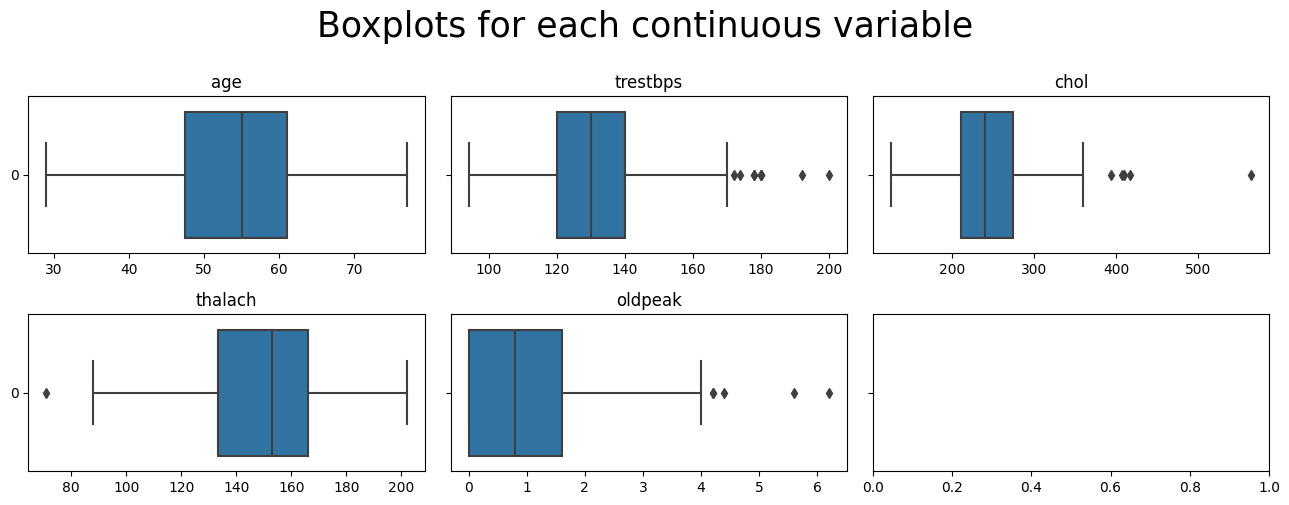

In [538]:
import matplotlib.pyplot as plt
import seaborn as sns
# checking boxplots
def boxplots_custom(dataset, columns_list, rows, cols):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(13,5))
    fig.suptitle('Boxplots for each continuous variable',y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data)
        
boxplots_custom(dataset=df, columns_list=numerical_columns, rows=2, cols=3)
plt.tight_layout()

### 1.2 Histograms for all continuous features

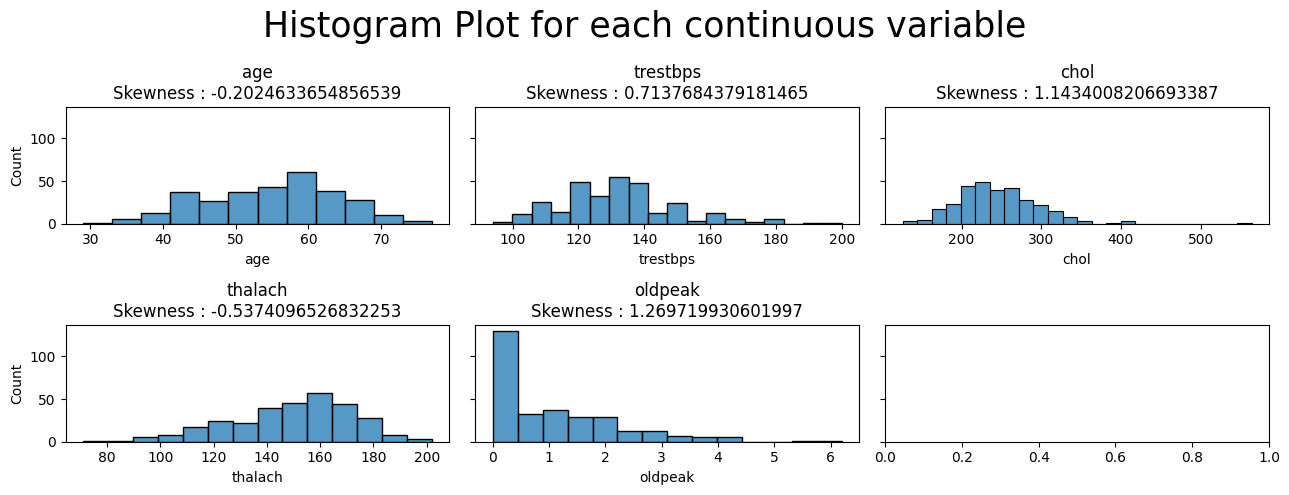

In [539]:
def colDistri(dataset,columns_list):

    fig, axs = plt.subplots(2, 3, sharey=True, figsize=(13,5))
    fig.suptitle('Histogram Plot for each continuous variable', fontsize=25)
    axs = axs.flatten()


    for i, data in enumerate(columns_list):
        sns.histplot(data=dataset, x=data, ax=axs[i])
        skewness = dataset[data].skew(axis = 0, skipna = True)
        axs[i].set_title(data+ '\nSkewness : '+ str(skewness))

colDistri(dataset=df, columns_list=numerical_columns)
plt.tight_layout()

In [540]:
#Filtering out only the patients with heart diseases
with_disease = df[df['target'].isin([1])]
with_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [541]:
gender_counts = with_disease.sex.value_counts()
gender_counts

1    93
0    72
Name: sex, dtype: int64

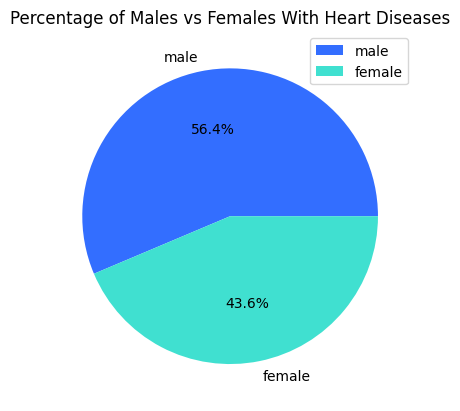

In [542]:
import matplotlib.pyplot as plt
import seaborn
plt.pie(gender_counts, labels = ["male", "female"],colors = ["#336EFF","turquoise"],autopct='%1.1f%%',)
plt.title("Percentage of Males vs Females With Heart Diseases")
plt.legend()
plt.show()

In [543]:
with_disease['age_group']=pd.cut(with_disease['age'],
                               bins=[28, 40, 50, 60, 999], 
                               labels=['29-40', '41-50', '51-60','60+'])
with_disease

C:\Users\uscs\AppData\Local\Temp\ipykernel_9656\1853143736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  with_disease['age_group']=pd.cut(with_disease['age'],


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,60+
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,29-40
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,41-50
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,51-60
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,51-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1,51-60
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1,51-60
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1,41-50
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1,29-40


[Text(0.5, 0, 'Age'), Text(0, 0.5, 'Number of Patients')]

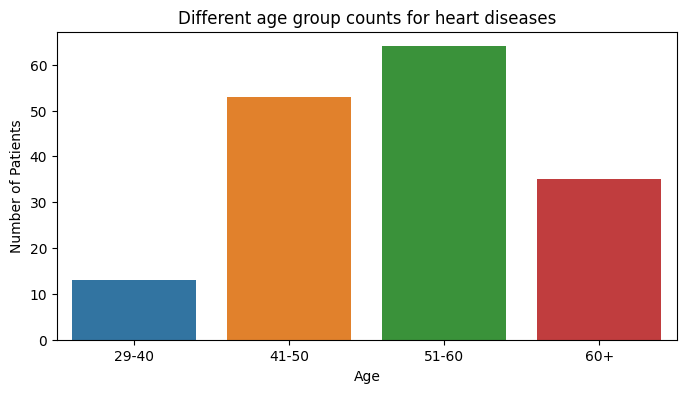

In [544]:
import seaborn as sns
age_group_counts = with_disease.age_group.value_counts()
plt.figure(figsize=(8, 4))
plt.title("Different age group counts for heart diseases")
ax=sns.barplot(x=age_group_counts.index, y=age_group_counts);
ax.set(xlabel='Age', ylabel='Number of Patients')

## 2. Preprocessing

### 2.1 Checking for missing data

In [545]:
print (df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


No missing values were detected. Therefore no need for data filling techniques

### 2.2 Detecting Outliers

We considered 3 methods for outlier detection: Inter Quartile Range, Standard deviation, and Z score. We detected and removed outliers in the numerical values only (age, trestbps, chol, thalach, oldpeak)

#### 2.2.1 Inter Quartile Range (IQR) 
IQR is one of the most extensively used procedure for outlier detection and removal It's so versatile because it makes no distributional assumptions. The general rule is that anything not in the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier, and can be removed.

In [546]:

def IQR_method (df,features):
   new_df = df
   for col in features:
      q1=df[col].quantile(0.25)

      q3=df[col].quantile(0.75)

      IQR=q3-q1
      new_df = df[~((df[col]<(q1-1.5*IQR))|(df[col]>(q3+1.5*IQR)))]
      print ("Number of outliers in ", col, "is ", df.shape[0] - new_df.shape[0])
      df = new_df
   
   print(df.shape)

In [547]:
# detecting outliers
IQR_method(df, numerical_columns)
print (df.shape)

Number of outliers in  age is  0
Number of outliers in  trestbps is  9
Number of outliers in  chol is  5
Number of outliers in  thalach is  1
Number of outliers in  oldpeak is  4
(284, 14)
(303, 14)


#### 2.2.2 Z-score

Though Z-Score is a highly efficient way of detecting and removing outliers, we cannot use it with every data type. When we said that, we mean that it only works with the data which is completely or close to normally distributed, which in turn stimulates that this method is not for skewed data, either left skew or right skew.

In [548]:
def z_score_method(df, features):
    df_no_outliers = df
    for col in features:
        upper_limit = df[col].mean() + 3*df[col].std()
        lower_limit = df[col].mean() - 3*df[col].std()
        df_no_outliers = df[~(df[col] > upper_limit) | (df[col] < lower_limit)]
        print ("Number of outliers in ", col, "is ", df.shape[0] - df_no_outliers.shape[0])
        df = df_no_outliers
    print (df.shape)

In [549]:
z_score_method(df, numerical_columns)

Number of outliers in  age is  0
Number of outliers in  trestbps is  2
Number of outliers in  chol is  4
Number of outliers in  thalach is  0
Number of outliers in  oldpeak is  2
(295, 14)


#### 2.2.3 Standard deviation

In [550]:
def std_method(df, features):
    df_no_outliers = df
    for col in features:
        mean = df[col].mean()
        std = df[col].std()
        upper_limit = mean - 3 * std
        lower_limit = mean + 3 * std

        df_no_outliers = df[~(df[col] > upper_limit) | (df[col] < lower_limit)]
        print ("Number of outliers in ", col, "is ", df.shape[0] - df_no_outliers.shape[0])
        df = df_no_outliers
    print (df.shape)

In [551]:
std_method(df, numerical_columns)

Number of outliers in  age is  3
Number of outliers in  trestbps is  13
Number of outliers in  chol is  8
Number of outliers in  thalach is  1
Number of outliers in  oldpeak is  12
(266, 14)


In [552]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [553]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Data Standardization

In [554]:
from sklearn.preprocessing import MinMaxScaler
def scaler(df,arr):
    dataframe_N=df[arr]
    scale = MinMaxScaler(feature_range=(0,1))
    norm_data=scale.fit_transform(dataframe_N)
    return norm_data
scaled_features = ['age', 'trestbps', 'chol', 'thalach','oldpeak', 'slope', 'thal']
df[scaled_features]=scaler(df,scaled_features)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1,3,0.481132,0.244292,1,0,0.603053,0,0.370968,0.0,0,0.333333,1
1,0.166667,1,2,0.339623,0.283105,0,1,0.885496,0,0.564516,0.0,0,0.666667,1
2,0.250000,0,1,0.339623,0.178082,0,0,0.770992,0,0.225806,1.0,0,0.666667,1
3,0.562500,1,1,0.245283,0.251142,0,1,0.816794,0,0.129032,1.0,0,0.666667,1
4,0.583333,0,0,0.245283,0.520548,0,1,0.702290,1,0.096774,1.0,0,0.666667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0,0,0.433962,0.262557,0,1,0.396947,1,0.032258,0.5,0,1.000000,0
299,0.333333,1,3,0.150943,0.315068,0,1,0.465649,0,0.193548,0.5,0,1.000000,0
300,0.812500,1,0,0.471698,0.152968,1,1,0.534351,0,0.548387,0.5,2,1.000000,0
301,0.583333,1,0,0.339623,0.011416,0,1,0.335878,1,0.193548,0.5,1,1.000000,0


#### Visualizing correlations

<AxesSubplot: >

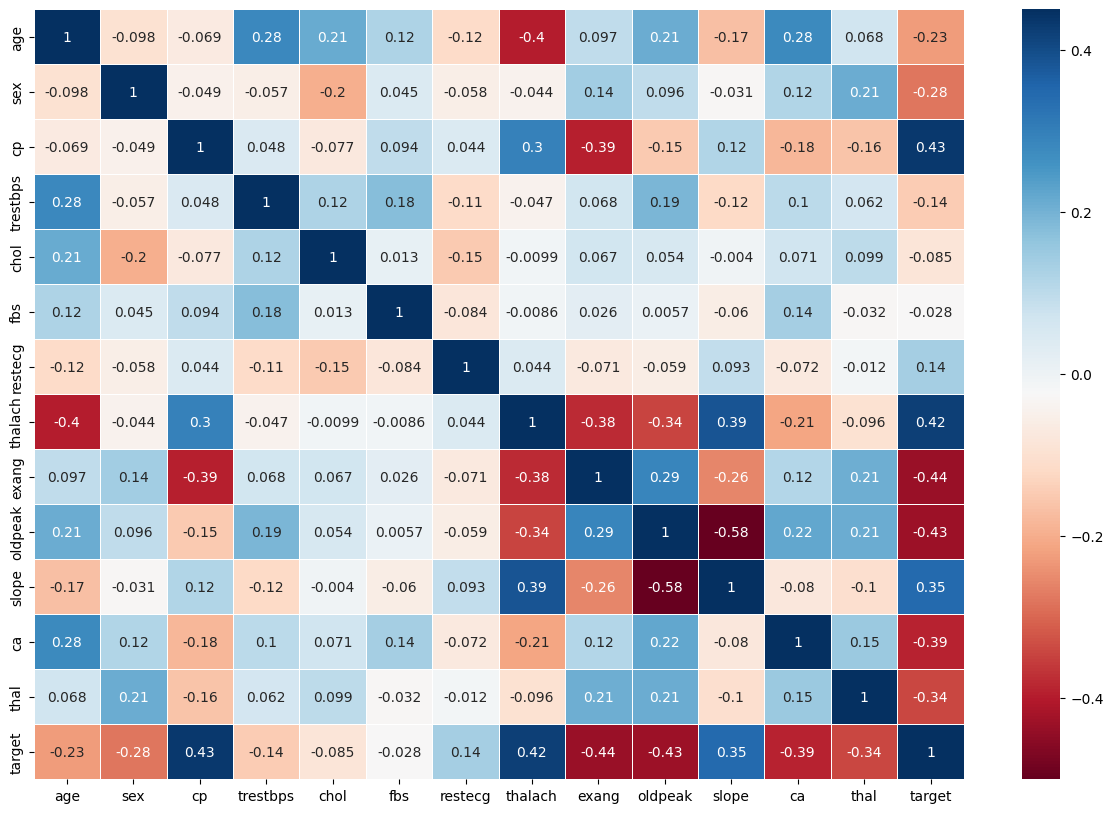

In [555]:
import numpy as np
corr_matrix = df.corr(method='pearson', numeric_only=True)
plt.subplots(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu', linewidths=0.5, vmin = -0.5, vmax = 0.45)

#### Extracting strong relations

In [556]:
lower_triangle = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k=-1).astype(bool))
strong_thresh = 0.4
strong_relations = []
for row in lower_triangle.index:
    for col in lower_triangle.columns:
        corr = lower_triangle[row][col]
        if corr >= strong_thresh or corr <= -strong_thresh:
            strong_relations.append([row,col,corr])
print(strong_relations)


[['cp', 'target', 0.43379826150689443], ['thalach', 'target', 0.4217409338106742], ['exang', 'target', -0.43675708335330315], ['oldpeak', 'slope', -0.5775368167291409], ['oldpeak', 'target', -0.4306960016873686]]


#### Visualizing strong relations

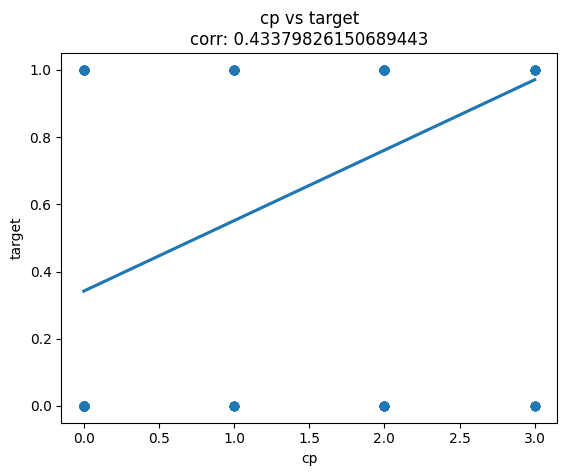

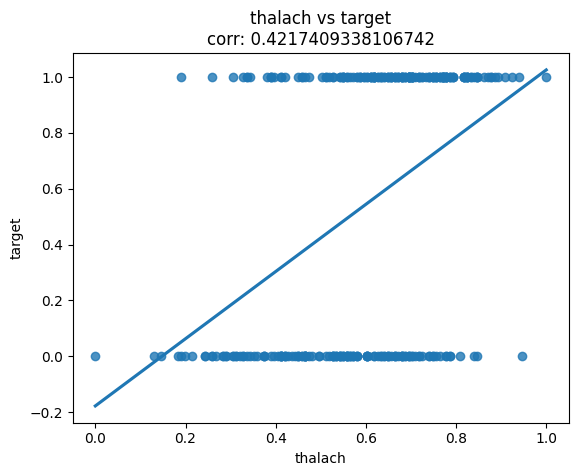

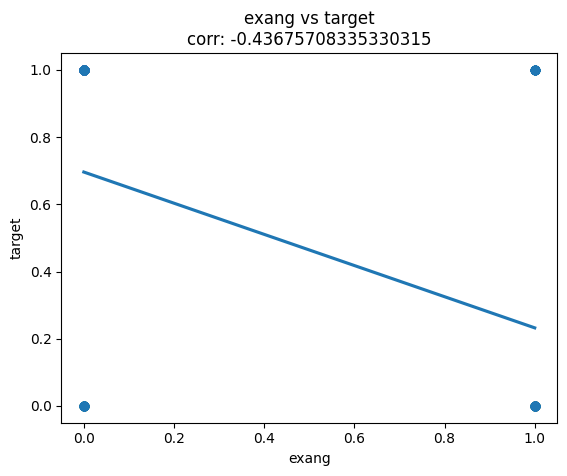

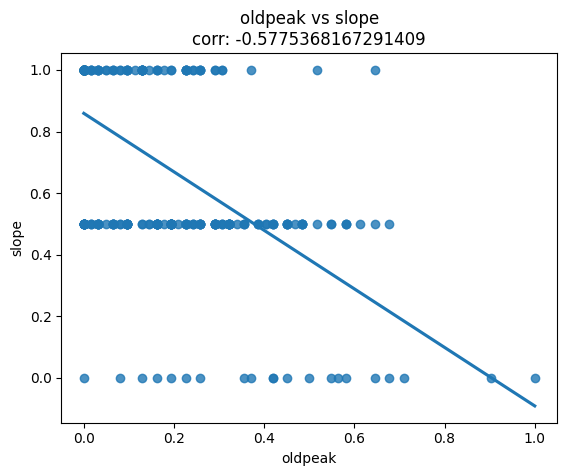

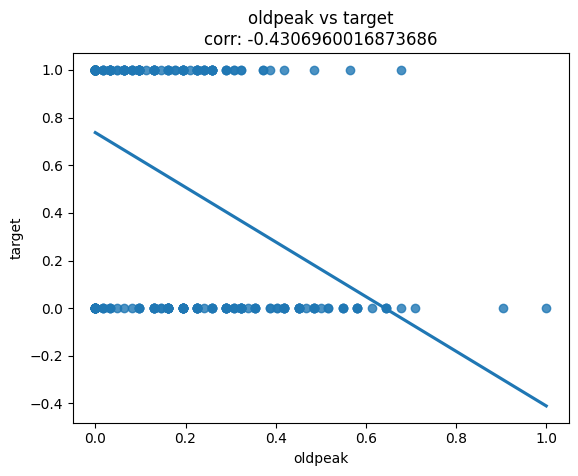

In [557]:
for relation in strong_relations:
    x = relation[0]
    y = relation[1]
    corr = relation[2]
    plt.figure()
    sns.regplot(x=x, y=y, data=df[[x,y]], fit_reg=True, ci=None)
    plt.title(f"{x} vs {y}\ncorr: {corr}")